<a href="https://colab.research.google.com/github/Zem-0/Stock_price_prediction-ML_Model/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [5]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.hea()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-06-16,186.729996,186.990005,184.270004,184.919998,184.192612,101235600,APPLE
2023-06-20,184.410004,186.100006,184.410004,185.009995,184.282257,49799100,APPLE
2023-06-21,184.899994,185.410004,182.589996,183.960007,183.236389,49515700,APPLE
2023-06-22,183.740005,187.050003,183.669998,187.000000,186.264435,51245300,APPLE
2023-06-23,185.550003,187.559998,185.009995,186.679993,185.945679,53079300,APPLE


In [7]:
AAPL.describe()


,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,183.136614,184.691474,181.732111,183.251793,182.963267,5.905254e+07
std,9.328492,9.393939,9.305165,9.413552,9.373468,2.180177e+07
min,165.350006,166.399994,164.080002,165.000000,165.000000,2.404830e+07
25%,175.244995,177.025002,173.660004,175.280006,175.037872,4.670805e+07
50%,183.550003,185.089996,181.919998,183.860001,183.395981,5.306800e+07
75%,190.570000,191.915001,189.454994,190.659996,190.223671,6.557715e+07
max,214.740005,220.199997,211.600006,214.240005,214.240005,1.981343e+08


In [8]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,142.603379,144.079374,141.364757,142.796295,142.638012,2.188385e+07
std,15.711983,15.783465,15.628810,15.798866,15.789918,8.297549e+06
min,116.760002,118.224998,115.830002,116.870003,116.737160,8.828600e+06
25%,131.974998,133.519997,130.800003,131.915001,131.765060,1.715150e+07
50%,138.600006,139.970001,137.570007,138.750000,138.592285,1.949450e+07
75%,150.305000,152.065002,149.320000,150.750000,150.578651,2.364250e+07
max,179.750000,182.080002,177.779999,179.559998,179.559998,5.879610e+07


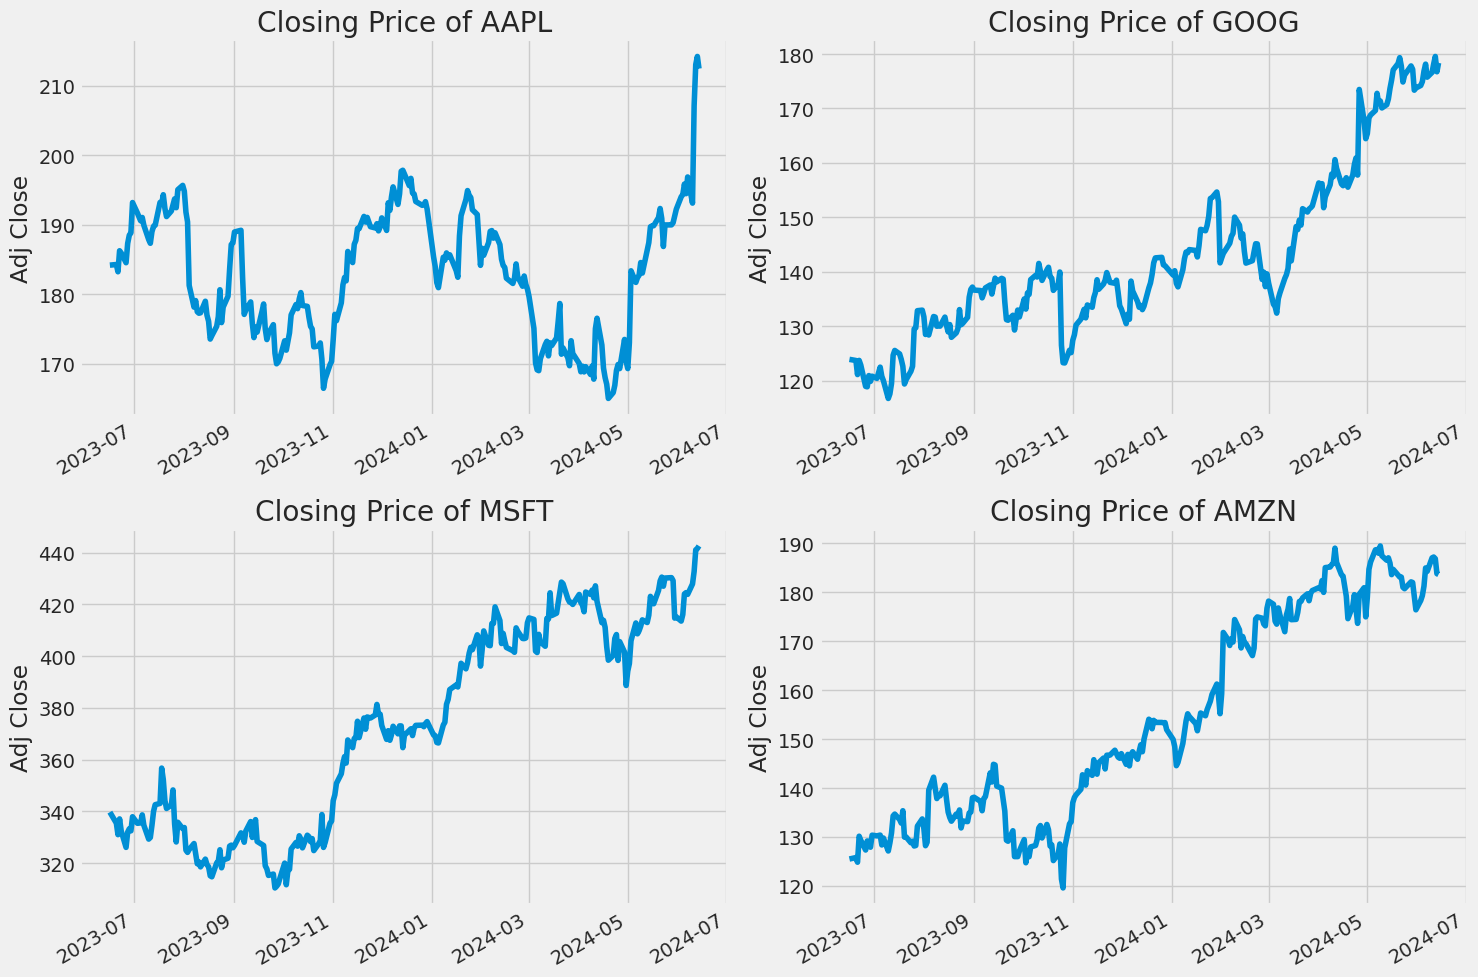

In [11]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

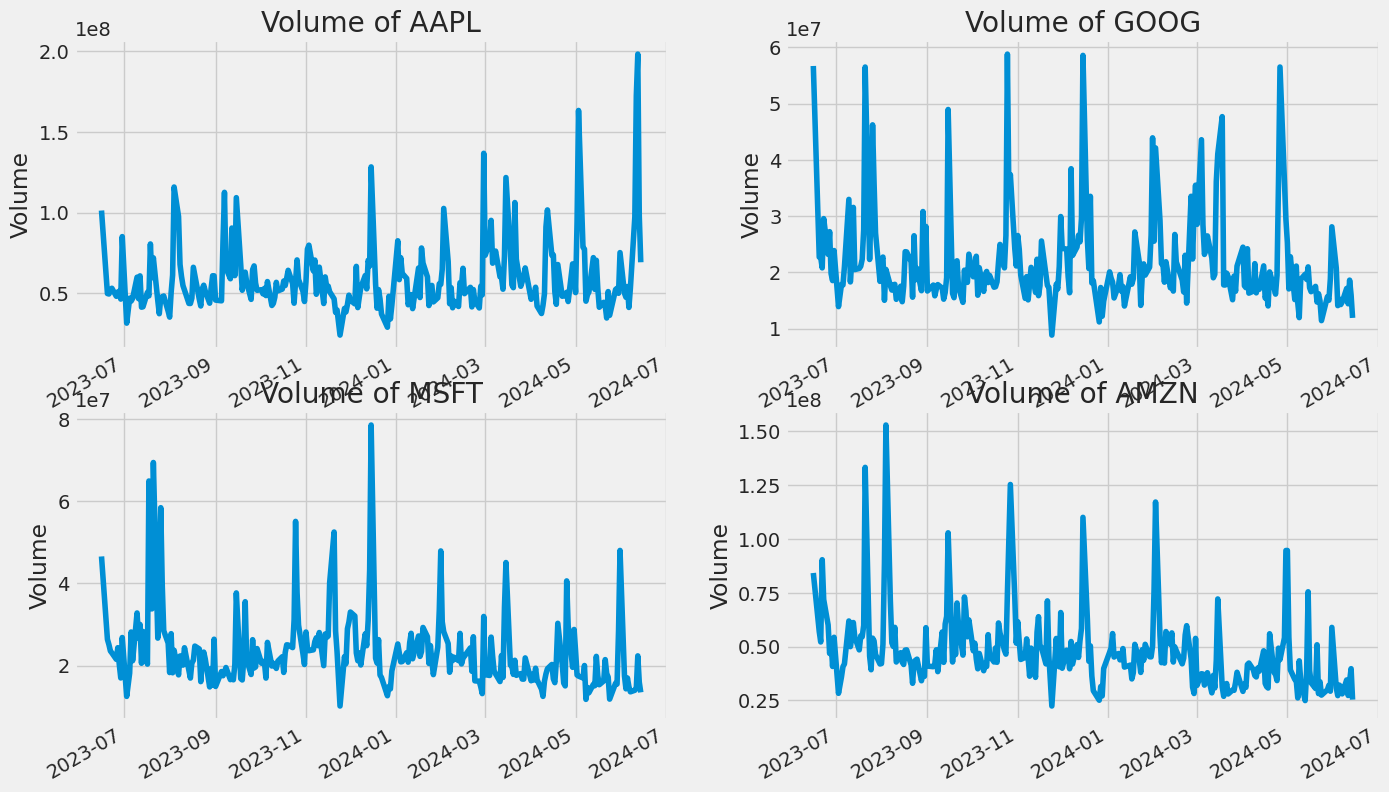

In [13]:
plt.figure(figsize=(15, 10))
for i,company in enumerate(company_list, 1):
  plt.subplot(2, 2, i)
  company['Volume'].plot()
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title(f"Volume of {tech_list[i - 1]}")


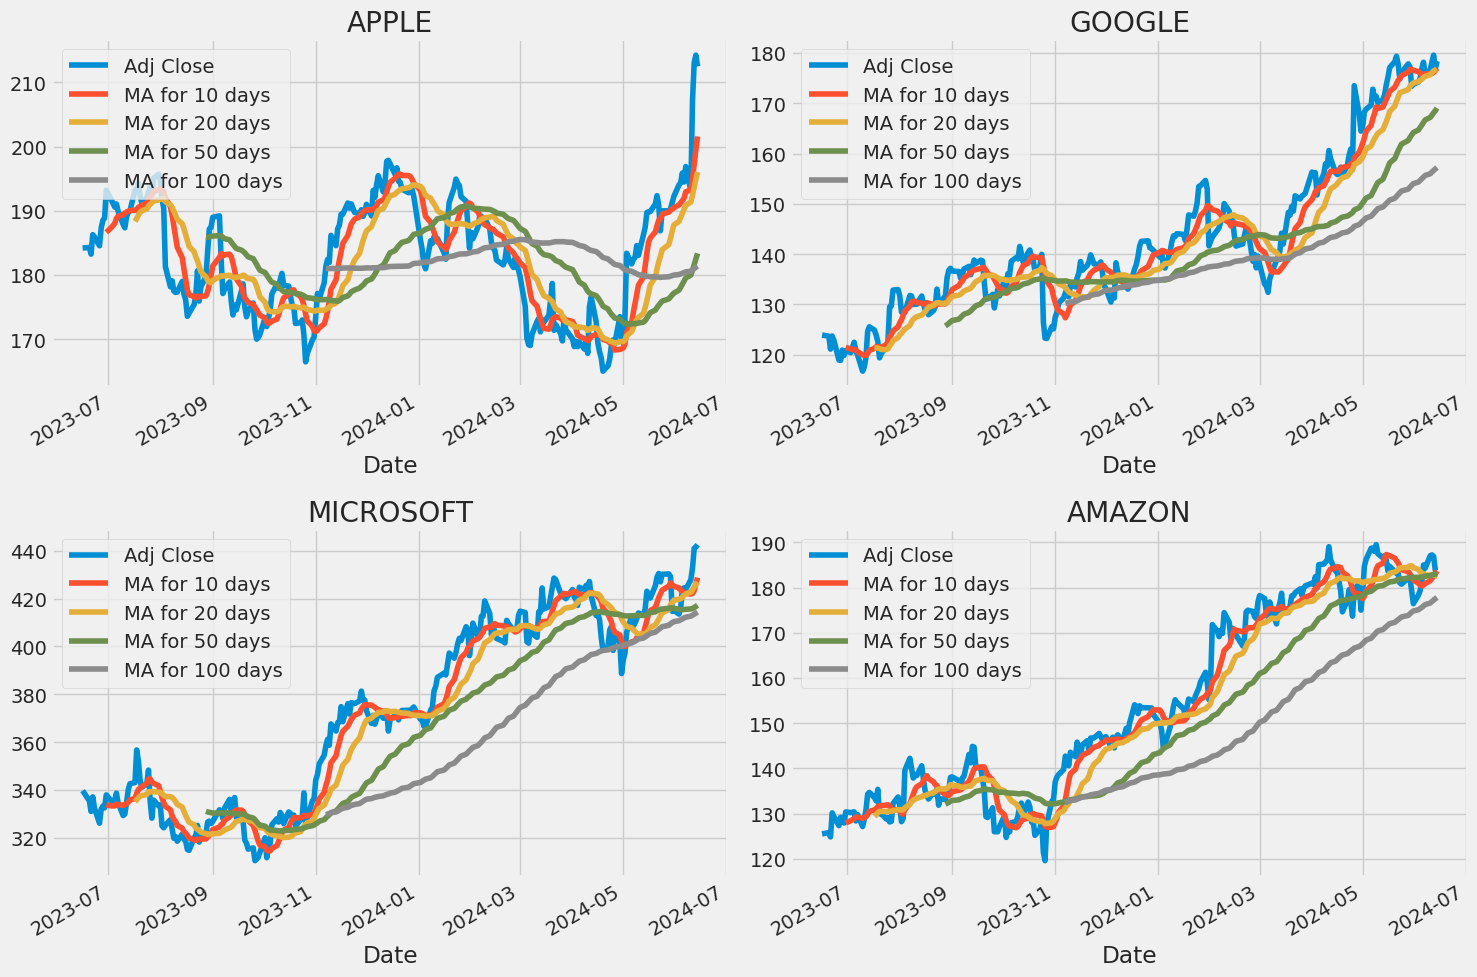

In [21]:
ma_day = [10, 20, 50,100]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days','MA for 100 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days','MA for 100 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days','MA for 100 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days','MA for 100 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()


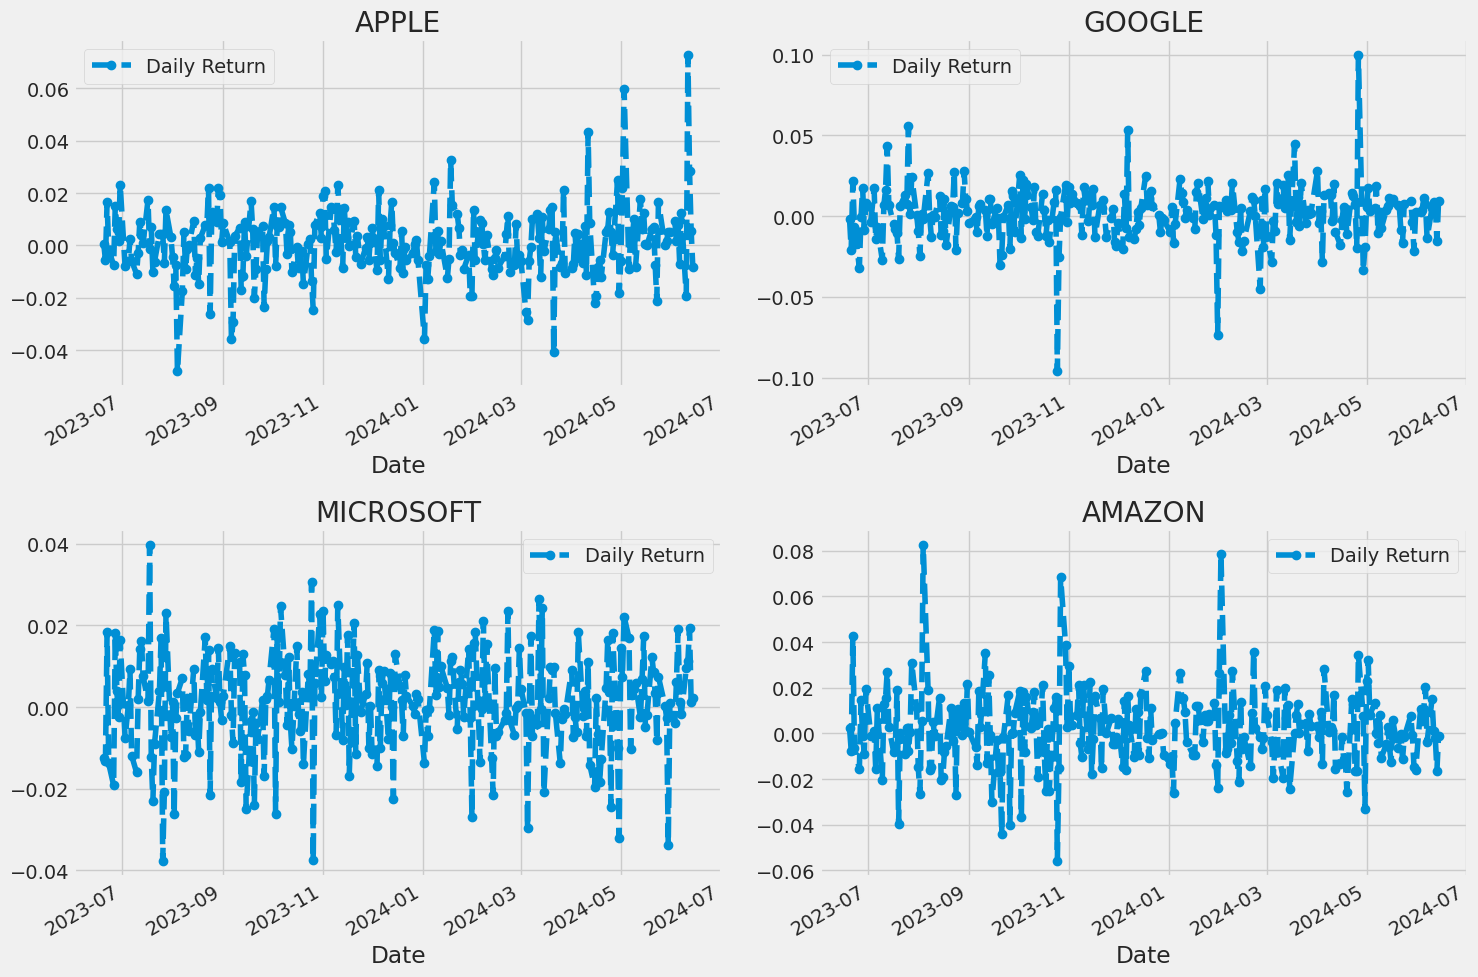

In [22]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

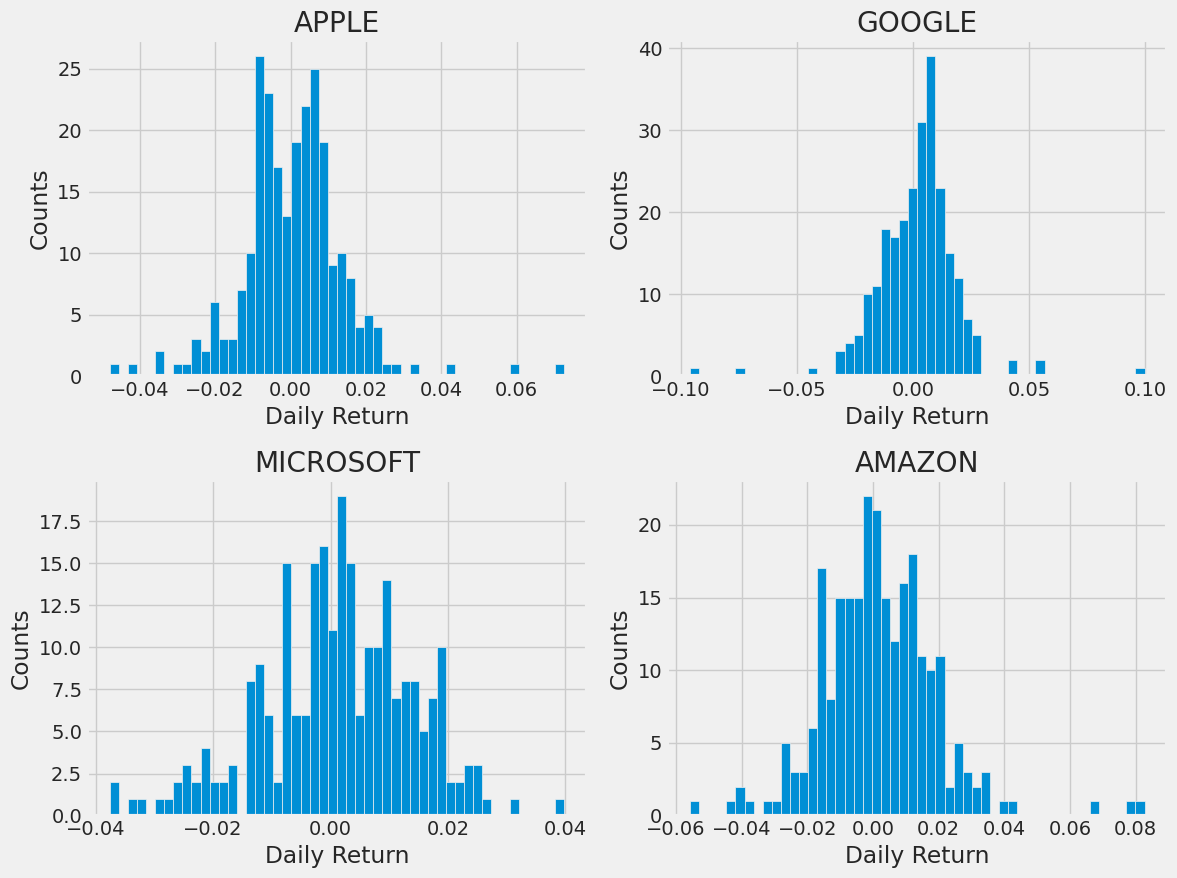

In [25]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [26]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-06-16,NaN,NaN,NaN,NaN
2023-06-20,0.000487,0.002311,-0.001693,-0.012503
2023-06-21,-0.005675,-0.007553,-0.020912,-0.013282
2023-06-22,0.016525,0.042618,0.021524,0.018437
2023-06-23,-0.001711,-0.006300,-0.006862,-0.013806


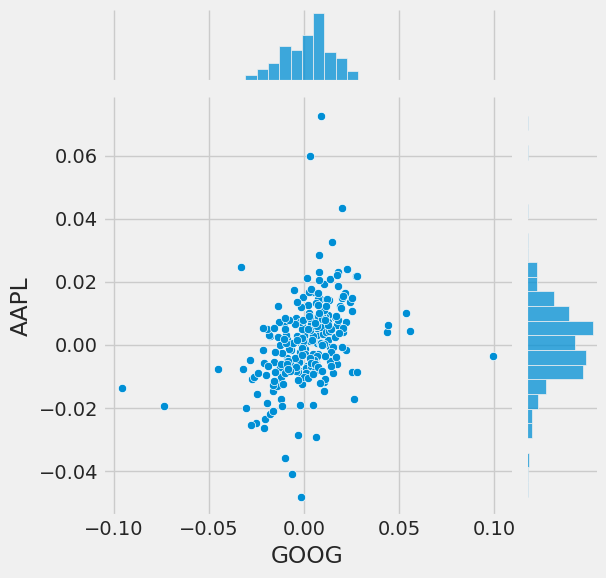

In [33]:
sns.jointplot(x='GOOG', y='AAPL', data=tech_rets, kind='scatter')

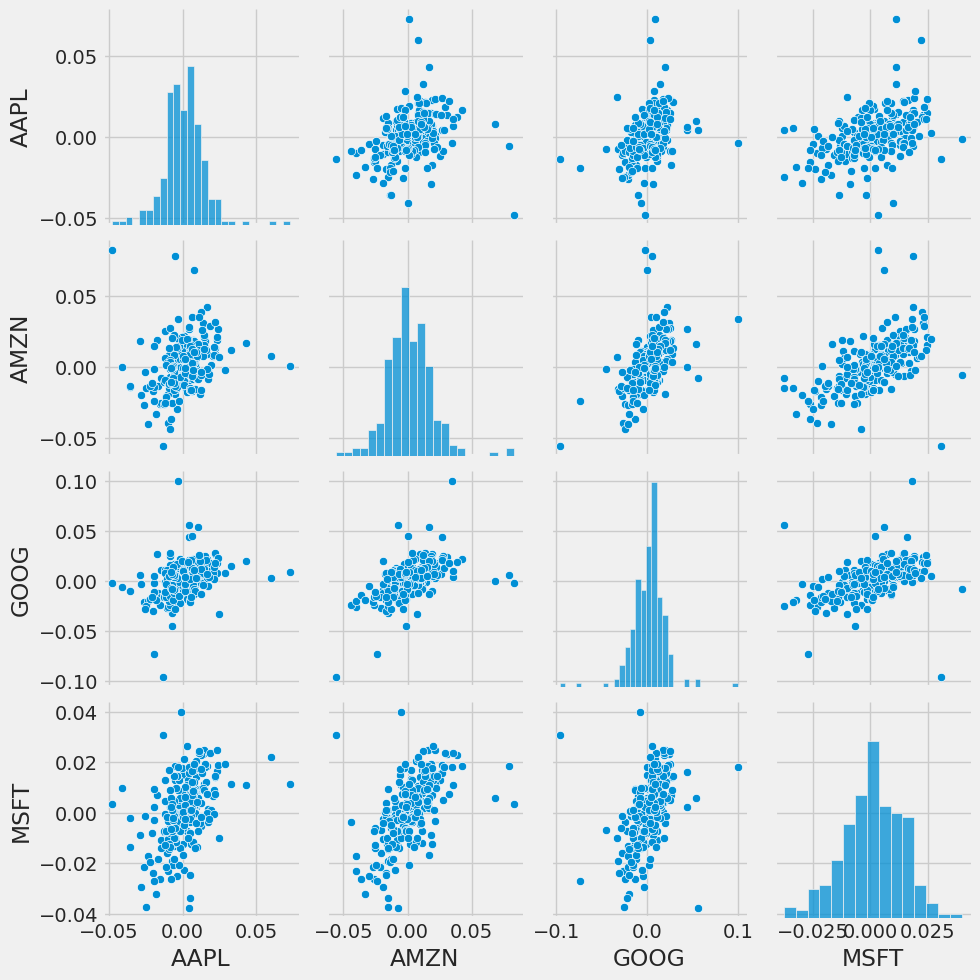

In [32]:
sns.pairplot(tech_rets)

Text(0.5, 1.0, 'Correlation of stock closing price')

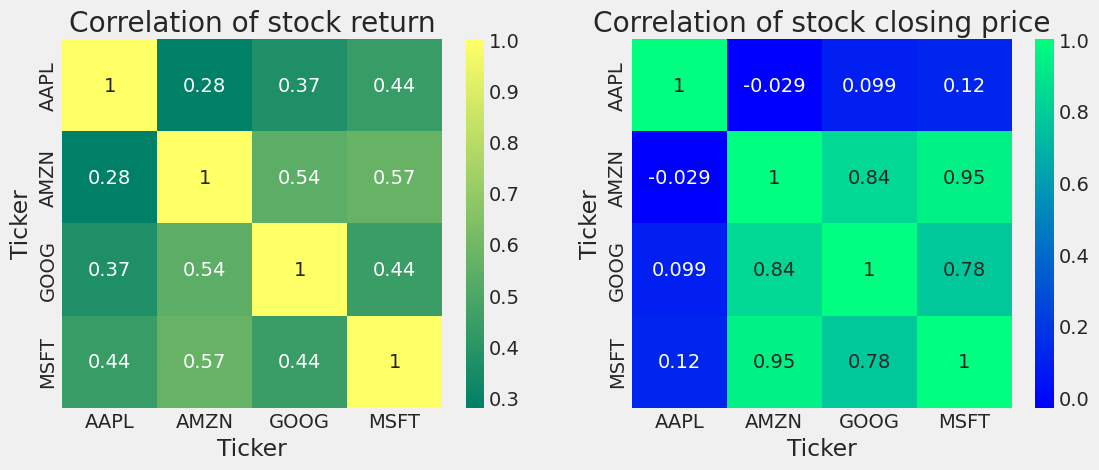

In [39]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='winter')
plt.title('Correlation of stock closing price')

In [40]:
df = pdr.get_data_yahoo('GOOG', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.554291,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.625692,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.395069,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.171415,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.485767,233776981
...,...,...,...,...,...,...
2024-06-10,176.449997,178.470001,174.380005,176.630005,176.630005,17122200
2024-06-11,177.720001,178.389999,175.440002,178.190002,178.190002,14402400
2024-06-12,179.750000,182.080002,177.779999,179.559998,179.559998,18600400


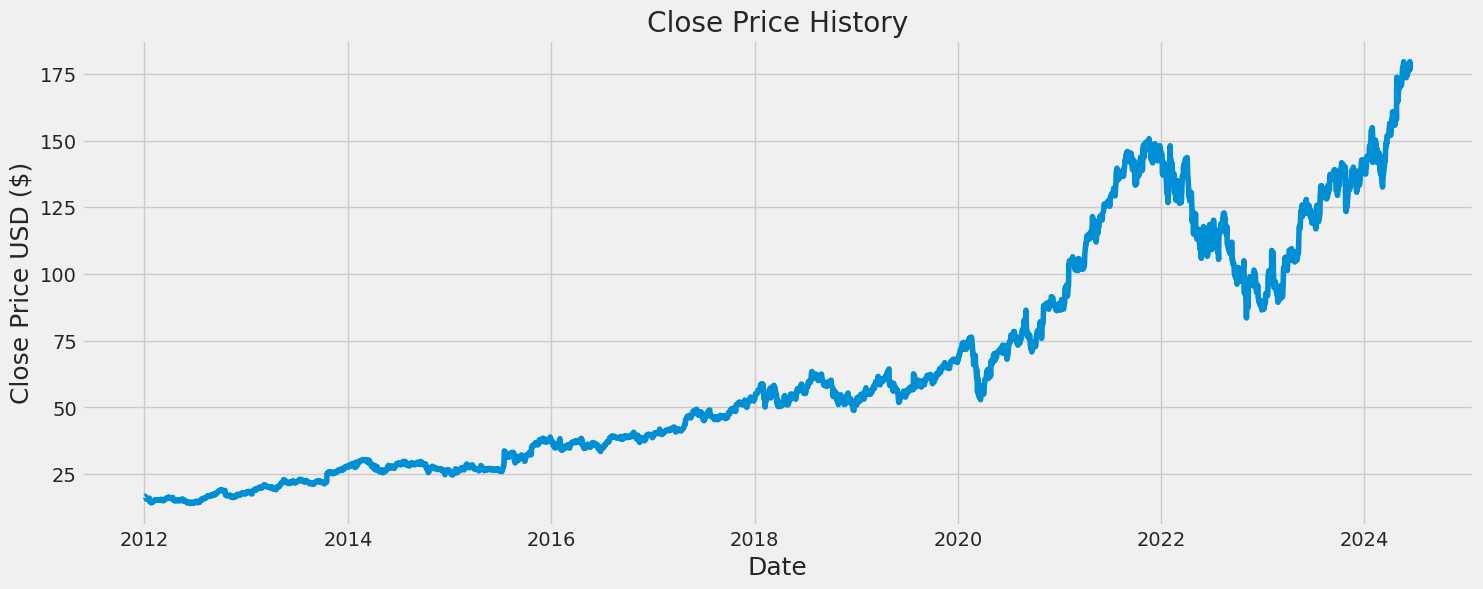

In [41]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [43]:
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .90 ))

training_data_len

2820

In [44]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01599333],
       [0.01642489],
       [0.01503096],
       ...,
       [1.        ],
       [0.98297476],
       [0.99281555]])

In [45]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.01599333, 0.01642489, 0.01503096, 0.01367915, 0.00953495,
       0.0096372 , 0.01006125, 0.0106146 , 0.00991539, 0.01045521,
       0.01110632, 0.01210777, 0.00405096, 0.00398029, 0.0032901 ,
       0.00156986, 0.00136084, 0.00314724, 0.00280289, 0.00316679,
       0.00327506, 0.00391864, 0.00560579, 0.00752451, 0.00717565,
       0.00763879, 0.00788088, 0.00704633, 0.00799215, 0.00762525,
       0.0069937 , 0.00713806, 0.00685536, 0.00826282, 0.00735158,
       0.0070764 , 0.00764631, 0.00755759, 0.00892294, 0.0089019 ,
       0.00952593, 0.009353  , 0.00830042, 0.00690348, 0.00718016,
       0.00723129, 0.00619524, 0.00693205, 0.00883122, 0.00856206,
       0.00933496, 0.00992291, 0.01126721, 0.01119353, 0.01216943,
       0.01308217, 0.0125619 , 0.01357538, 0.01322804, 0.01454227])]
[0.01343705016533965]

[array([0.01599333, 0.01642489, 0.01503096, 0.01367915, 0.00953495,
       0.0096372 , 0.01006125, 0.0106146 , 0.00991539, 0.01045521,
       0.01110632, 0.01210777, 0.00

In [47]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2760/2760 [==============================] - 158s 56ms/step - loss: 9.7494e-04


In [48]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

10/10 [==============================] - 1s 36ms/step


4.041904084622388

<ipython-input-49-bac245597b66>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


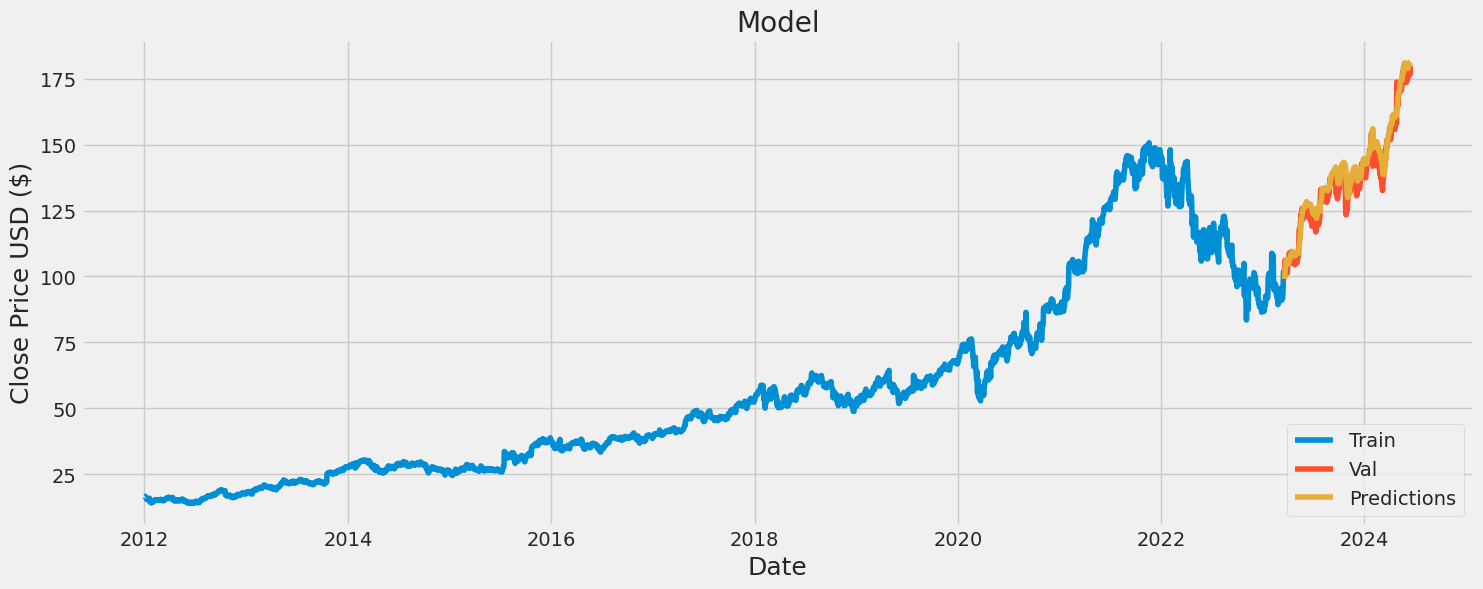

In [49]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [50]:
df = pdr.get_data_yahoo('MSFT', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.200512,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.699442,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.921186,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.261726,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,21.968704,59706800
...,...,...,...,...,...,...
2024-06-10,424.700012,428.079987,423.890015,427.869995,427.869995,14003000
2024-06-11,425.480011,432.820007,425.250000,432.679993,432.679993,14551100
2024-06-12,435.320007,443.399994,433.250000,441.059998,441.059998,22366200


In [51]:
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .90 ))

training_data_len

2820

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[9.61075474e-04],
       [2.47476877e-03],
       [3.14752390e-03],
       ...,
       [9.96371913e-01],
       [9.97621286e-01],
       [1.00000000e+00]])

In [53]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00096108, 0.00247477, 0.00314752, 0.00418068, 0.00329168,
       0.00353195, 0.00324363, 0.00391638, 0.00451706, 0.00454108,
       0.004469  , 0.00420471, 0.00802498, 0.00807304, 0.00713599,
       0.00766458, 0.00752042, 0.00687169, 0.00778472, 0.0075925 ,
       0.00845747, 0.00860163, 0.00929841, 0.00920231, 0.00956271,
       0.01030754, 0.01057184, 0.00992311, 0.01011533, 0.00932244,
       0.0088419 , 0.01182124, 0.01172513, 0.01218164, 0.01177318,
       0.01201345, 0.01227775, 0.0119654 , 0.0132148 , 0.01290245,
       0.01422393, 0.01371937, 0.01304661, 0.01246996, 0.01314272,
       0.01355117, 0.01350312, 0.01362326, 0.01513695, 0.01537722,
       0.01556943, 0.01496876, 0.01400769, 0.01350312, 0.01331091,
       0.01352715, 0.01355117, 0.01494474, 0.01477655, 0.01398366])]
[0.013815468532095768]

[array([0.00096108, 0.00247477, 0.00314752, 0.00418068, 0.00329168,
       0.00353195, 0.00324363, 0.00391638, 0.00451706, 0.00454108,
       0.004469  , 0.00420471, 0.0

In [55]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2760/2760 [==============================] - 161s 57ms/step - loss: 6.9544e-04


In [56]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

10/10 [==============================] - 1s 35ms/step


8.138435737472742

<ipython-input-57-bac245597b66>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


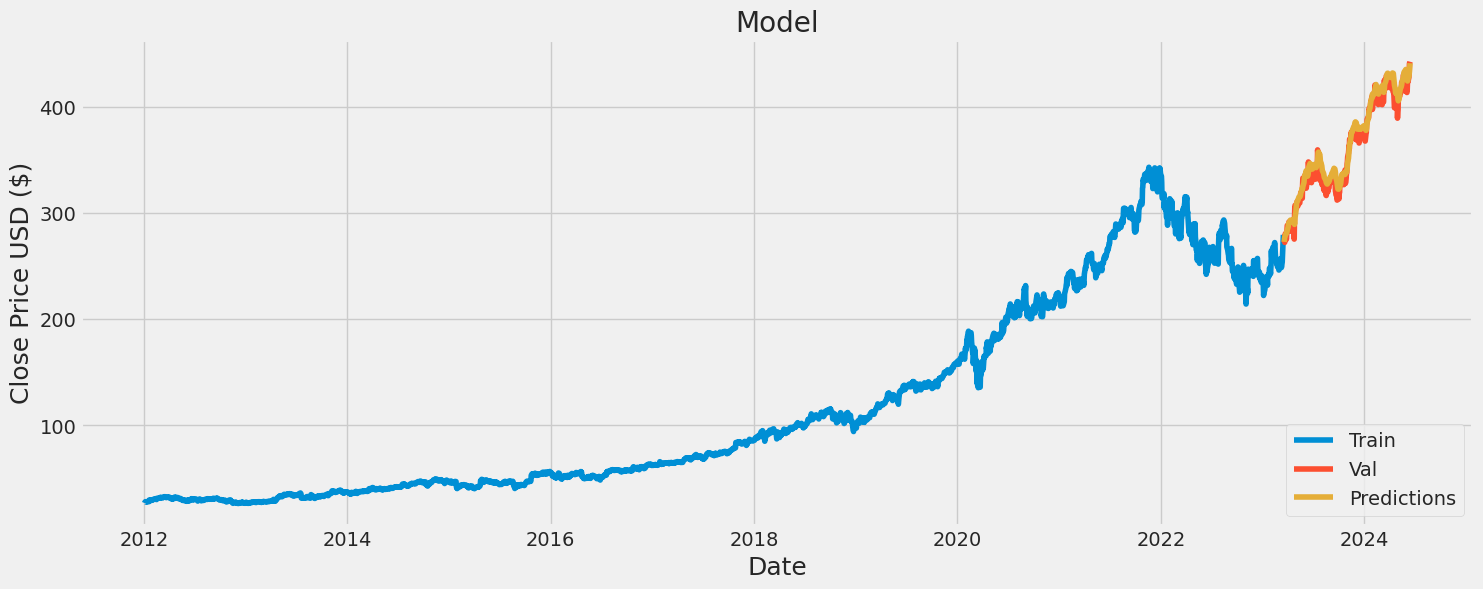

In [57]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()